# Example of well log linear inversion

The method presented here was proposed by (Savre, 1963). See the pdf note (`well_log_linear_inversion.pdf`).

References

* Savre, W.C., 1963, *Determination of a more accurate porosity and mineral 
composition in complex lithologies with the use of the sonic, neutron, and density 
surveys*: **Journal of Petroleum Technology**, v. 15, no. 9, pp. 945–959, 
https://doi.org/10.2118/617-PA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate synthetic data for  single point

In [2]:
# densities in g/cm³
rho_f = 1.00
rho_A = 2.98
rho_D = 2.82
rho_G = 2.35

In [3]:
# sonic transit times in micro-sec/m
# constant converting foot to meter = 0.3048
ft2m = 0.3048
dt_f = (1/ft2m)*188.7
dt_A = (1/ft2m)*50.0
dt_D = (1/ft2m)*40.0
dt_G = (1/ft2m)*52.6

In [4]:
# matrix A
A = np.array([[1, 0, 0, 0.49],
              [dt_f, dt_A, dt_D, dt_G],
              [rho_f, rho_A, rho_D, rho_G],
              [1, 1, 1, 1]])

In [5]:
phi_true = 0.15
A_true = 0.41
D_true = 0.47
G_true = 0.12

In [6]:
rho_tilde = A_true*rho_A + D_true*rho_D + G_true*rho_G
dt_tilde = A_true*dt_A + D_true*dt_D + G_true*dt_G

In [7]:
rho_tilde

2.8292

In [8]:
dt_tilde

149.64566929133858

In [9]:
p_true = np.array([phi_true,
                   A_true*(1-phi_true),
                   D_true*(1-phi_true),
                   G_true*(1-phi_true)])

In [10]:
d_true = np.dot(A, p_true)

In [11]:
d_true

array([1.99980000e-01, 2.20062992e+02, 2.55482000e+00, 1.00000000e+00])

### Solve the inverse problem for a single point

In [12]:
ATA = np.dot(A.T, A)
ATd = np.dot(A.T, d_true)

In [13]:
p = np.linalg.solve(ATA, ATd)

In [14]:
p

array([0.15  , 0.3485, 0.3995, 0.102 ])

In [15]:
np.sum(p)

1.0000000000598275

### Generate synthetic data for a set of points

In [16]:
# densities in g/cm³
rho_f = 1.00
rho_A = 2.98
rho_D = 2.82
rho_G = 2.35

In [17]:
# sonic transit times in micro-sec/m
# constant converting foot to meter = 0.3048
ft2m = 0.3048
dt_f = (1/ft2m)*188.7
dt_A = (1/ft2m)*50.0
dt_D = (1/ft2m)*40.0
dt_G = (1/ft2m)*52.6

In [18]:
# matrix A
A = np.array([[1, 0, 0, 0.49],
              [dt_f, dt_A, dt_D, dt_G],
              [rho_f, rho_A, rho_D, rho_G],
              [1, 1, 1, 1]])

In [19]:
N_samples = 100

In [20]:
phi_true = 5 + 20*np.random.rand(N_samples)
phi_true /= 100

In [21]:
A_true = np.random.rand(N_samples)
D_true = np.random.rand(N_samples)
G_true = np.random.rand(N_samples)
total = A_true+D_true+G_true
A_true /= total
D_true /= total
G_true /= total

In [22]:
np.allclose(A_true+D_true+G_true, np.ones(N_samples))

True

In [23]:
p_true = np.vstack([phi_true,
                    A_true*(1-phi_true),
                    D_true*(1-phi_true),
                    G_true*(1-phi_true)])

In [24]:
p_true.shape

(4, 100)

In [25]:
d_true = np.dot(A, p_true)

In [26]:
d_true.shape

(4, 100)

### Solve the inverse problem for the set of points

In [27]:
ATA = np.dot(A.T, A)
ATd = np.dot(A.T, d_true)

In [28]:
p = np.linalg.solve(ATA, ATd)

In [29]:
p.shape

(4, 100)

In [30]:
np.allclose(np.sum(p, axis=0), np.ones(N_samples))

True

In [31]:
d = np.dot(A, p)

In [32]:
d.shape

(4, 100)

### Plot the results

In [33]:
z = np.arange(N_samples)

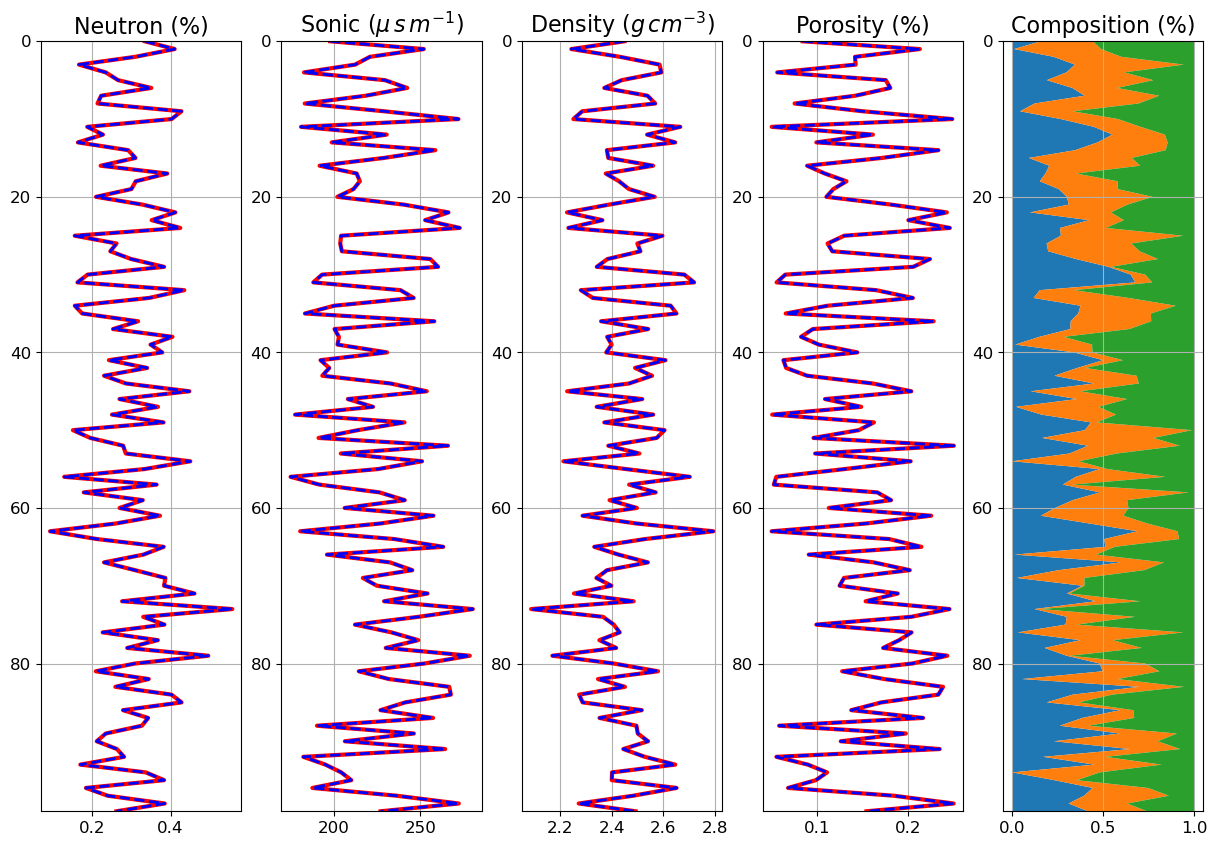

In [34]:
data_names = ['Neutron (%)', 'Sonic ($\mu \, s \, m^{-1}$)', 'Density ($g \, cm^{-3}$)']

plt.figure(figsize=(15,10))

for i, t in enumerate(data_names):

    plt.subplot(1,5,i+1)
    plt.title(t, fontsize=16)
    plt.plot(d_true[i], z, 'r-', linewidth=3)
    plt.plot(d[i], z, 'b--', linewidth=2)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.ylabel('z (m)', fontsize=14)
    plt.ylim(np.max(z), np.min(z))
    plt.grid()

plt.subplot(1,5,4)
plt.title('Porosity (%)', fontsize=16)
plt.plot(p_true[0], z, 'r-', linewidth=3)
plt.plot(p[0], z, 'b--', linewidth=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylabel('z (m)', fontsize=14)
plt.ylim(np.max(z), np.min(z))
plt.grid()

plt.subplot(1,5,5)
plt.title('Composition (%)', fontsize=16)

#plt.plot(p_true[1], z, 'r-', linewidth=3)
#plt.plot(p[1], z, 'b--', linewidth=2)
plt.fill_betweenx(z, p[1]/(1-p[0]))

#plt.plot(p_true[1]+p_true[2], z, 'r-', linewidth=3)
#plt.plot(p[1]+p[2], z, 'b--', linewidth=2)
plt.fill_betweenx(z, (p[2]+p[1])/(1-p[0]), p[1]/(1-p[0]))

#plt.plot(p_true[1]+p_true[2]+p_true[3], z, 'r-', linewidth=3)
#plt.plot(p[1]+p[2]+p[3], z, 'b--', linewidth=2)
plt.fill_betweenx(z, (p[3]+p[2]+p[1])/(1-p[0]), (p[2]+p[1])/(1-p[0]))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylabel('z (m)', fontsize=14)
plt.ylim(np.max(z), np.min(z))
plt.xlim()
plt.grid()

plt.show()